In [1]:
import os

In [2]:
import pandas as pd

In [3]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
profese = [
    "Animace",
    "Architekt",
    "Asistent kamery",
    "Asistent režie",
    "Autor komentáře",
    "Dramaturg",
    "Druhá kamera",
    "Hrají",
    "Hudba",
    "Choreografie",
    "Kamera",
    "Kaskadéři",
    "Koordinátor kaskadérů",
    "Koproducent",
    "Masky",
    "Návrhy kostýmů",
    "Návrhy titulků",
    "Odborný poradce",
    "Pedagogické vedení",
    "Pomocná režie",
    "Postprodukce",
    "Producent",
    "Produkce",
    "Předloha",
    "Původní filmový námět",
    "Režie",
    "Scénář",
    "Spolupráce",
    "Střih",
    "Technický scénář",
    "Vedoucí produkce",
    "Vedoucí výroby",
    "Výprava",
    "Výkonná produkce",
    "Výtvarná spolupráce",
    "Výtvarník",
    "Zástupce vedoucího produkce",
    "Zástupce vedoucího výroby",
    "Zpívá"]

In [7]:
def spoj(x):
    seznam = []
    if isinstance(x, str):
        if x.strip() not in seznam:
            seznam.append(x.strip())
    if isinstance(x, list):
        for y in x:
            if isinstance(y, str):
                if y.strip() not in seznam:
                    seznam.append(y.strip())
    return(seznam)

In [8]:
def spoj2(x):
    seznam = []
    for y in x:
        for z in y:
            if z not in seznam:
                seznam.append(z)
    return(seznam)

In [9]:
df["Lidé"] = df[profese].apply(lambda x: [spoj(x) for x in x.values], axis=1).apply(lambda x: spoj2(x))

In [14]:
lide = df[["Copyright","Film","Lidé"]].explode("Lidé").sort_values(by="Copyright")

In [55]:
debuty = pd.DataFrame(lide.groupby("Lidé")["Copyright"].first()).reset_index()

In [56]:
debuty

,Lidé,Copyright
0,,2001
1,(person),2002
2,- 123 min (23598),2006
3,1997 /česky naposledy Pragma Praha 2012/),2013
4,2001 – román),2016
...,...,...
33431,Žán Loose (11369),2004
33432,živé malování),2013
33433,žáci Scholae cantorum (59846),1946
33434,žáci a kurzisté Československého filmového ústavu,1945


In [37]:
debuty.sample(10)

,Copyright
Lidé,
Sára Peková (86287),2012
Martin Voldřich (89050),1993
Otto Zander (128369),1932
Yann Mari Faget (84472),2012
Vladimír Mišík (25010),1977
Jan Červenka (129511),1940
Helen Charmichael /ž/ (psychoterapie),2018
Sergej Sanža (49188),2009
Milan Gregor (33175),2007


In [43]:
debuty.index

Index(['', '(person)', '- 123 min (23598)',
       '1997 /česky naposledy Pragma Praha 2012/)', '2001 – román)',
       '2006; Dcera čarodějnice – kniha)', '2007', '2017 – film)',
       '2Mouchy (84216)', '3Beep (103102)',
       ...
       'Žofie Veselá (125302)', 'Žofie Zajíčková (77945)',
       'Žofie Červená (130187)', 'Žorž Čamov (37294)', 'Žák (63328)',
       'Žán Loose (11369)', 'živé malování)', 'žáci Scholae cantorum (59846)',
       'žáci a kurzisté Československého filmového ústavu',
       'Ǻshild Ramborg /ž/'],
      dtype='object', name='Lidé', length=33436)

<AxesSubplot:xlabel='Copyright'>

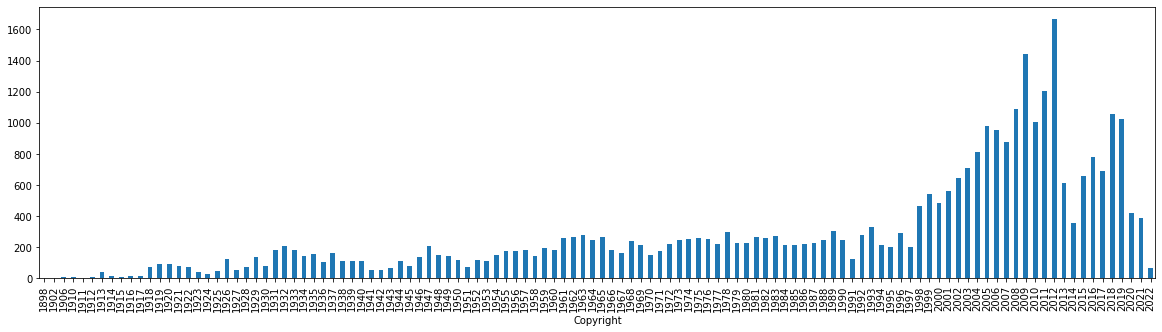

In [60]:
debuty.groupby("Copyright")["Lidé"].nunique().plot.bar(figsize=(20,5))

In [62]:
derniery = pd.DataFrame(lide.sort_values(by="Copyright").groupby("Lidé")["Copyright"].last()).reset_index()

<AxesSubplot:xlabel='Copyright'>

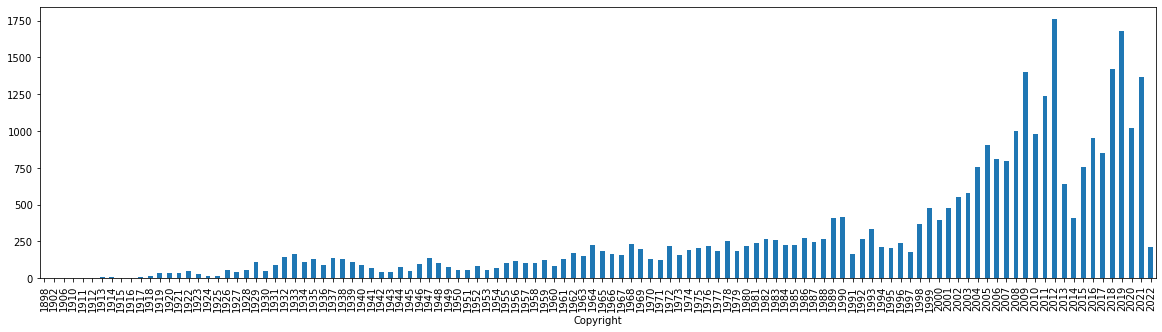

In [63]:
derniery.groupby("Copyright")["Lidé"].nunique().plot.bar(figsize=(20,5))

In [64]:
rezie = df[["Copyright","Film","Režie"]]

In [65]:
rezijni_derniery = pd.DataFrame(rezie.explode("Režie").sort_values(by="Copyright").groupby("Režie")["Copyright"].last()).reset_index()

<AxesSubplot:xlabel='Copyright'>

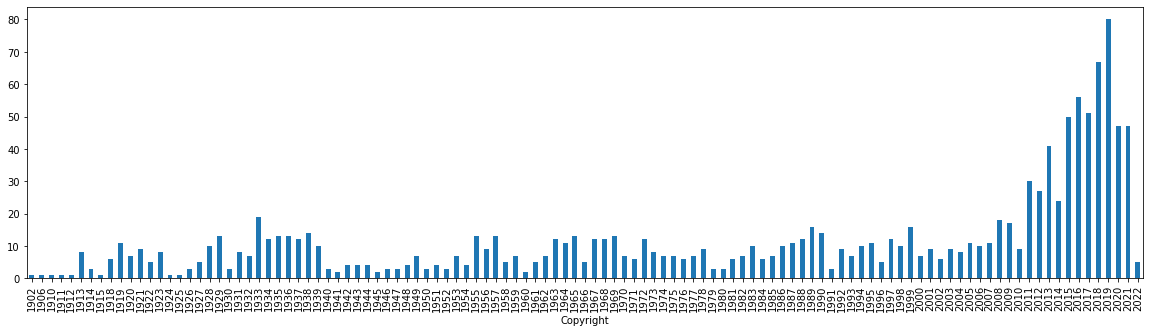

In [66]:
rezijni_derniery.groupby("Copyright")["Režie"].nunique().plot.bar(figsize=(20,5))

In [67]:
rezijni_premiery = pd.DataFrame(rezie.explode("Režie").sort_values(by="Copyright").groupby("Režie")["Copyright"].first()).reset_index()

<AxesSubplot:xlabel='Copyright'>

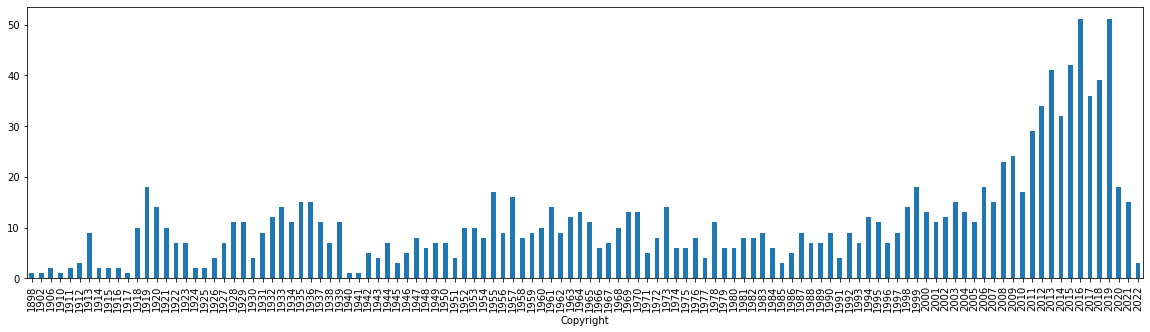

In [68]:
rezijni_premiery.groupby("Copyright")["Režie"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

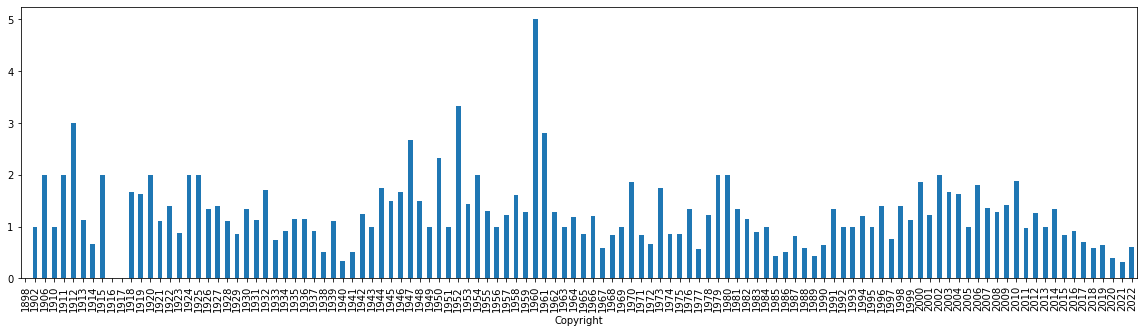

In [71]:
pd.Series(rezijni_premiery.groupby("Copyright")["Režie"].nunique() / rezijni_derniery.groupby("Copyright")["Režie"].nunique()).plot.bar(figsize=(20,5))